<a href="https://colab.research.google.com/github/beakdongH/Colaboratory/blob/main/study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **전공동아리 - IF**

In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [ ]:
from urllib.request import urlopen #import한 urllib.request 모듈에서 특정(urlopen) 함수만 추출해서 사용한다  - 유알엘 오픈이다.
from bs4 import BeautifulSoup #html,xml문서를 데이터 분석(파싱) 해 원하는 정보를 추출하는 라이브러리다. 방식은 위와 같다

url = urlopen("https://news.naver.com/main/ranking/popularMemo.naver") #url을 urlopen을 통해 오픈한다.
soup = BeautifulSoup(url, 'html.parser') #BeautifulSoup를 이용해 파싱한다. html.parser은 파싱하는 인자 중하나이다.

def news_li(new_contents):
  news = soup.find("a", {"class": "list_title nclicks('RBP.cmtnws')"}) #뉴스 기사 출력
  ranking = soup.find("em", {"class": "list_ranking_num"})  #뉴스 등수 출력
  timenews = soup.find("span", {"class": "list_time"}) #뉴스 등록 시간
  print(ranking.text+"등 :",news.text)
  print(timenews.text)
  print()

media = soup.find("strong", {"class": "rankingnews_name"})    #뉴스 언론사 출력
print(media.text)

news_tabs = soup.find_all("div", {"class": "list_content"}) #한 탭(li /li)내에 있는 모든 정보를 가져온다.

news_li(news_tabs[0])               #1,2,3등을 나눠서 출력하고 싶은데,,

머니투데이
1등 : 이렇게 좋은데 안팔리네?…신형 쏘나타 LPG 타고 속초 가보니[시승기]
8시간전



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import requests
import cv2
import numpy as np
import matplotlib.pyplot as plt

url = "https://news.naver.com/main/ranking/popularMemo.naver"
response = requests.get(url)
soup = BeautifulSoup(response.content, 'html.parser')

def news_li(news_content):
    news_title = news_content.find("a", {"class": "list_title nclicks('RBP.cmtnws')"})
    ranking = news_content.find("em", {"class": "list_ranking_num"})
    timenews = news_content.find("span", {"class": "list_time"})

    if news_title and ranking and timenews:
        print(ranking.text + "등 :", news_title.text)
        print(timenews.text)
        print()

        image_tags = news_content.find_all("img")
        for img_tag in image_tags:
            img_url = img_tag.get("src")
            if img_url and not img_url.startswith("data:"):
                print("Image URL:", img_url)
                display(Image(url=img_url))
                print()
        print()

media = soup.find("strong", {"class": "rankingnews_name"})
if media:
    print(media.text)

news_tabs = soup.find_all("div", {"class": "list_content"})

for news_tab in news_tabs:
    news_li(news_tab)


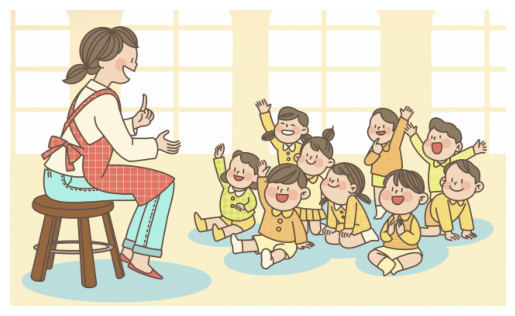

In [ ]:
#이미지따와
#문제점 - 이미지 코드가 있어야만 떼온
import cv2
import requests
import numpy as np
import matplotlib.pyplot as plt

img_url = 'https://imgnews.pstatic.net/image/011/2023/08/25/0004230510_001_20230826085001032.jpg?type=w647'

response = requests.get(img_url)
img_array = np.frombuffer(response.content, np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()



In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

url = urlopen("https://news.naver.com/main/ranking/popularMemo.naver")  #urlopen으로 네이버 랭킹뉴스 url을 저장
soup = BeautifulSoup(url, 'html.parser') #BeautifulSoup로 파싱

def news_li(news_contents, ranking):      #함수선언 news_li
    news = news_contents.find("a", {"class": "list_title nclicks('RBP.cmtnws')"}) #뉴스 제목찾기
    timenews = news_contents.find("span", {"class": "list_time"}) #뉴스 시간찾기
    print(f"{ranking}등:", news.text) #랭킹과 뉴스이름 출력
    print(timenews.text)  #뉴스 시간 출력
    print()

media = soup.find("strong", {"class": "rankingnews_name"})  #언론사 이름 찾기
print(media.text) #출력

news_tabs = soup.find_all("div", {"class": "list_content"}) #한 탭의 뉴스 모두 찾기

for idx, news_content in enumerate(news_tabs[:3], start=1):   #상위 3개의 뉴스만 출력
    news_li(news_content, idx)  #함수호출(뉴스콘텐츠, 인덱스(번호))

서울신문
1등: ‘김포 등 중소도시 서울 편입’ 반대 58.6%, 찬성 31.5% [리얼미터]
3시간전

2등: “해돋이 보자” 재혼 20일만에 추락사…보험금 ‘14억’ 남편에게
3시간전

3등: “돈 많다고 韓입국 거부 당했습니다”…분노한 태국인들
1시간전



In [3]:
# import requests
# from bs4 import BeautifulSoup
# from PIL import Image
# from io import BytesIO

# # 크롤링할 웹 페이지 URL
# url = "https://news.naver.com/main/ranking/popularMemo.naver"

# # 웹 페이지 내용 가져오기
# response = requests.get(url)
# soup = BeautifulSoup(response.content, 'html.parser')

# # 이미지 태그 찾기
# img_tags = soup.find_all('img')

# # 이미지 다운로드 및 저장
# for img_tag in img_tags:
#     img_url = img_tag['src']
#     if img_url.startswith('http'):
#         img_response = requests.get(img_url)
#         img = Image.open(BytesIO(img_response.content))
#         img.save('image.jpg')  # 이미지를 파일로 저장
#         img.show()  # 이미지를 표시


KeyboardInterrupt: ignored

In [ ]:
!pip install requests
!pip install beautifulsoup4

In [ ]:
#뉴스 제목과 등수, 뉴스의 링크를 출력
import urllib.request
import requests
from urllib.request import urlopen
from bs4 import BeautifulSoup

response=urlopen("https://news.naver.com/main/ranking/popularMemo.naver")
soup=BeautifulSoup(response, "html.parser")

title=soup.find("a",{"class": "list_title nclicks('RBP.cmtnws')"})
title2=title.text.strip()
print(title2[0:])

rank=soup.find("em",{"class":"list_ranking_num"})
rank2=rank.text.strip()
print(rank2)

url = "https://news.naver.com/main/ranking/popularMemo.naver"
req = urllib.request.Request(url)
sourcecode = urllib.request.urlopen(url).read()
soup = BeautifulSoup(sourcecode, "html.parser")

href=soup.find("div", class_="list_content")
print(href.find("a")["href"])


'단식' 옹호 나선 박지원 "이재명 죽어야 나라가 산다"
1
https://n.news.naver.com/article/031/0000769745?ntype=RANKING


In [6]:
#평균온도 출력
import requests
from bs4 import BeautifulSoup

#url
url = 'https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=0&ie=utf8&query=%EB%84%A4%EC%9D%B4%EB%B2%84+%EB%82%A0%EC%94%A8'

result = requests.get(url)
texts = result.text

soup = BeautifulSoup(texts, 'html.parser')#text태그를 사용하기 어려움

#strong=온도
temper = soup.find('strong', class_='current')#strong태그를 사용하기 어려움.

#값출력
print("Current Temperature:", temper)


Current Temperature: None


# **대회 - BIT**

In [ ]:
import requests
from bs4 import BeautifulSoup
import webbrowser

def search_images(keyword, num_images):

    url = f"https://www.google.com/search?q={keyword}&tbm=isch"

    response = requests.get(url)

    soup = BeautifulSoup(response.text, 'html.parser')

    image_urls = []
    for img in soup.find_all('img', limit=num_images):
        image_url = img['src']
        if not image_url.endswith('.gif'):
            image_urls.append(image_url)

    return image_urls

keyword = input("검색할 키워드 입력: ")
num_images = int(input("가져올 이미지 개수 입력: "))
image_urls = search_images(keyword, num_images)

for url in image_urls:
    webbrowser.open_new_tab(url)


검색할 키워드 입력: 영도
가져올 이미지 개수 입력: 5


# **공부해용가리**

In [ ]:
!pip install gtts

from gtts import gTTS

text="안녕하세요"
tts = gTTS(text=text,lang='ko')
tts.save(r"3.텍스트를 음성으로 변환\hi.mp3")


In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

In [10]:
pip install --upgrade selenium


In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By

In [11]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import time

# 크롬 드라이버 경로 설정
browser = webdriver.Chrome('C:/chromedriver.exe')#경로설정에 에러 발생

# 네이버 홈페이지 열기
browser.get('https://www.naver.com')

# 네비게이션 메뉴에서 '쇼핑' 링크 클릭
browser.find_element_by_css_selector('a.nav.shop').click()
time.sleep(2)

# 검색 입력 상자 찾기
search = browser.find_element_by_css_selector('input.co_srh_input._input')

# 검색어 입력
search.send_keys('아이폰 13')

# 엔터 키 입력 (검색 실행)
search.send_keys(Keys.ENTER)

# 웹 브라우저 종료
browser.quit()


AttributeError: ignored

# **기초**

In [ ]:
#print("123")
#주석은 실행하지 않는다. - 한줄은 #(우물 정)


123


In [12]:
 print(2//3) # // - 정수의 몫만 구해짐
 print(2/3)  # / - 소수점 까지 구해짐
 print(2%3)  # % - 나머지 연산자

0
0.6666666666666666
2


In [ ]:
print("Hello"+"World","Welcome")

HelloWorld Welcome


In [ ]:
이름 = '법사'
직업 = '파이썬 선생님'
키 = "77"
print("안녕 내 이름은 "+이름+"야.")
print("직업은 "+직업+",")
print("키는 "+키+"이야.")


안녕 내 이름은 법사야.
직업은 파이썬 선생님,
키는 77이야.


# **Input**

In [ ]:
print("="*10+"챗봇 시작"+"="*10)
name = input("네 이름은 뭐니?")
print("반가워, "+name+"!")
print("나는 톤톤이라고 해.")
print("="*10+"챗봇 종료"+"="*10)

==========챗봇 시작==========
네 이름은 뭐니?사과
반가워, 사과!
나는 톤톤이라고 해.
==========챗봇 종료==========


In [ ]:
a = int(input("나누어지는 수를 입력하세요"))
b = int(input("나누는 수를 입력하세요"))
print("몫은",a//b,"입니다")
print("나머지는",a%b,"입니다")


나누어지는 수를 입력하세요10
나누는 수를 입력하세요3
몫은 3 입니다
나머지는 1 입니다


In [ ]:
a = int(input("원의 반지름을 적으세요"))
print("원의 넓이는 {:.2f}입니다".format(a*a*3.14))


원의 반지름을 적으세요5
원의 넓이는 78.50입니다


# **리스트**

In [ ]:
t = ["법사","파이썬 스쿨 선생님",77,80,["타임머신","순간이동","투명변신"]]
print("인덱스1 :",t[0])
print("인덱스2 :",t[3])
print("인덱스3 :",t[-1])

인덱스1 : 법사
인덱스1 : 80
인덱스1 : ['타임머신', '순간이동', '투명변신']


In [ ]:
t.append(100)
t.append("건강")
print(t)

['법사', '파이썬 스쿨 선생님', 77, 80, ['타임머신', '순간이동', '투명변신'], 44, 100, 100, '건강']


# **조건문**

In [ ]:
n = int(input("점수는? "))
if(1<=n<3):
  print("초급")
elif(n<1):
  print("급 없음")
elif(3<=n<5):
  print("중급")
elif(5<=n<7):
  print("고급")
else:
  print("최고급")

점수는? 6
고급


In [ ]:
m = ['장미','벌침','이슬']
p = ['꿀잠','비행']

if len(m) >= 3 and '장미' in m:
  print('러브 포션 완성')
  p.append('러브')

else:
  print("정체 모를 포션 완성")

for i in p:
  print("포션 보유중중")

러브 포션 완성
포션 보유중중
포션 보유중중
포션 보유중중


# **반복문**

In [ ]:
for i in [10,20,30]:
  a = 2*i
  print(a, end= " ")

20 40 60 

In [ ]:
p = ['타이밍 포션','투명 포션','러브 포션']


a =" "
while a !="3":
    a = input("정답")
print("1번문제 정답")

정답1
정답6
정답7
정답3
1번문제 정답


In [ ]:
while True:
  print("일어나세요")
  a = int(input("잠자는 학생 수 "))
  if a == 0:
    print("좋은하루")
    break

일어나세요
잠자는 학생 수1
일어나세요
잠자는 학생 수3
일어나세요
잠자는 학생 수0
좋은하루


# **기온 데이터 분석하기**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving ta_20230819150817.csv to ta_20230819150817.csv


In [ ]:
#모두
import csv
f = open("ta_20230819150817.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter=',')

for row in data:
  print(row)


f.close()

In [ ]:
#헤더만
import csv
f = open("ta_20230819150817.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter=',')

header = next(data)

for row in data:
  print(row)

  row[4] = float(row[4])
  row[1] = float(row[1])


f.close()

In [ ]:
import csv
f = open("extremum_20230118104714.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter='.')

header = next(data)

max_temp = -999
mat_date = ''
for row in data:
  if row[5] == '':
    row[5] = -999
  row[5] = float(row[5])
  if mat_temp < row[5]:
    max_date = row[6]
    mat_temp = row[5]
  f.close()
  import csv
print("기상 관측 아래 서울의 최고 기온이 가장 높았던 날은 %s로 %.2f였습니다",mat_date, max_temp)


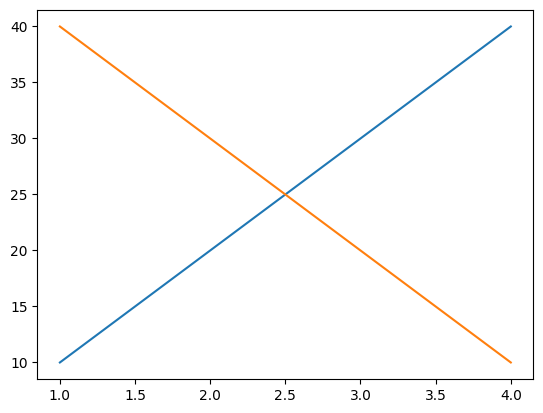

In [ ]:
import matplotlib.pyplot as plt
plt.plot([1,2,3,4],[10,20,30,40], label='asc')
plt.plot([1,2,3,4],[40,30,20,10], label='decs')
plt.show()

In [ ]:
import csv
f = open("ta_20230819150817.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter='.')

header = next(data)

result = []

for row in data:
  if row[5] != '':
    result.append(float(row[5]))
print(result)

import matplotlib.pyplot as plt
plt.plot(result,'r')

plt.title('plotting')
plt.plot([1,2,3,4],[10,20,30,40], label='acs')
plt.plot([1,2,3,4],[40,30,20,10], label='dcse')
plt.legend()
plt.show()


IndexError: ignored

In [ ]:
import csv
f = open("extremum_20230119104639.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter=',')

header = next(data)

result = []

for row in data:
  if row[5] != '' :
    if row[2].split('-')[1]=='Aug' and row[2].spilt('-')[2] == '10':
      result.append(float(row[5]))
print(result)

import matplotlib.pyplot as plt
plt.rc('font',family='NanumBarumGothic')
plt.rcParams['axes.unicode_minus'] = False
plt.title('내생일의 기온 변화 그래프')
plt.plot(result,'hotpink')
plt.show()
f.close()

In [ ]:
import csv
f = open("extremum_20230119103514.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter='.')

header = next(data)

result = []

import matplotlib.pyplot as plt
plt.

# **프로젝트**


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving extremum_20230120094020.csv to extremum_20230120094020.csv


2007 최고기온 [11.8, 14.8, 16.2, 22.5, 30.1, 33.2, 31.2, 33.2, 31.1, 26.2, 19.3, 13.8]
2007 최저기온 [-7.6, -8.6, -7.6, 1.6, 9.0, 14.1, 17.7, 19.8, 14.1, 3.2, -5.5, -7.4]
2022 최고기온 [2.6, 3.8, 12.7, 20.6, 25.0, 27.5, 31.0, 28.9, 27.2, 19.7, 15.4, 1.7]
2022 최저기온 [-6.2, -5.3, 3.2, 10.0, 13.9, 19.8, 24.2, 23.1, 18.2, 10.3, 5.6, -6.6]


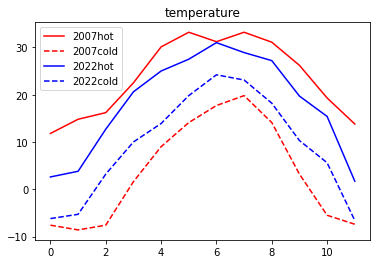

In [ ]:
#우리가 태어난 해(2007)와 작년(2022)의 최고, 최저 기온 비교

import csv
f = open("extremum_20230120094020.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter=',')
header = next(data)

result1 = []                         #result 리스트 추가
result2 = []
result3 = []
result4 = []

for row in data:
  if row[5] != '':                          #만약 row[5]가 빈칸이 아니라면?
    result1.append(float(row[5]))            #result1 리스트에 row[5](2007최고기온) 추가

  if row[15] != '':
    result2.append(float(row[15]))

  if row[8] != '':                          #만약 row[8]가 빈칸이 아니라면?
    result3.append(float(row[8]))           #result3 리스트에 row[8](2007최저기온) 추가


  if row[18] != '':
    result4.append(float(row[18]))


print("2007 최고기온",result1)                                 #리스트 출력
print("2007 최저기온",result3)
print("2022 최고기온",result2)
print("2022 최저기온",result4)

import matplotlib.pyplot as plt

plt.plot(result1,'r',label="2007hot")            #그래프 출력
plt.plot(result3,'r--',label="2007cold")
plt.plot(result2,"blue",label ="2022hot")
plt.plot(result4,"b--",label ="2022cold")

plt.title('temperature')                        #제목을 temperature로
plt.legend()                                    #그래프에 범례 표시
plt.show()


[-7.6, -8.6, -7.6, 1.6, 9.0, 14.1, 17.7, 19.8, 14.1, 3.2, -5.5, -7.4]
[-6.2, -5.3, 3.2, 10.0, 13.9, 19.8, 24.2, 23.1, 18.2, 10.3, 5.6, -6.6]


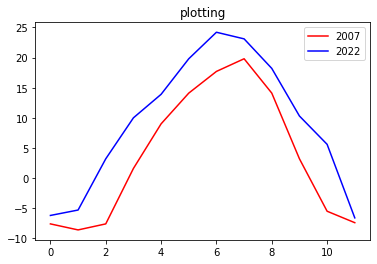

In [ ]:
import csv
f = open("extremum_20230120094020.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter=',')
header = next(data)

result = []
result2= []

for row in data:
  if row[8] != '':
    result.append(float(row[8]))

  if row[18] != '':
    result2.append(float(row[18]))

print(result)
print(result2)


import matplotlib.pyplot as plt
plt.plot(result,'r',label=2007)
plt.plot(result2,"blue",label =2022)

plt.title('plotting')
plt.legend()
plt.show()


In [ ]:
import csv
f = open("extremum_20230120094020.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter=',')
header = next(data)

for row in data:
  print(row)


f.close()

['\t\t108', '서울', '07-Jan', '0.4', '4.1', '11.8', '2007-01-04', '-2.8', '-7.6', '2007-01-14', '', '\t\t108', '서울', '22-Jan', '-2.2', '2.6', '8.4', '2022-01-24', '-6.2', '-11.3', '2022-01-12']
['\t\t108', '서울', '07-Feb', '4', '8.7', '14.8', '2007-02-28', '0.1', '-8.6', '2007-02-02', '', '\t\t108', '서울', '22-Feb', '-1.1', '3.8', '11.5', '2022-02-28', '-5.3', '-10.7', '2022-02-17']
['\t\t108', '서울', '07-Mar', '6.1', '10.3', '16.2', '2007-03-23', '2.3', '-7.6', '2007-03-06', '', '\t\t108', '서울', '22-Mar', '7.7', '12.7', '19.5', '2022-03-12', '3.2', '-3', '2022-03-06']
['\t\t108', '서울', '07-Apr', '11.4', '16.1', '22.5', '2007-04-29', '7.5', '1.6', '2007-04-03', '', '\t\t108', '서울', '22-Apr', '14.8', '20.6', '28.7', '2022-04-26', '10', '3.5', '2022-04-03']
['\t\t108', '서울', '07-May', '18.1', '23.4', '30.1', '2007-05-27', '13.6', '9', '2007-05-10', '', '\t\t108', '서울', '22-May', '19.1', '25', '30.7', '2022-05-23', '13.9', '7.9', '2022-05-01']
['\t\t108', '서울', '07-Jun', '23.2', '27.7', '33.2'

In [ ]:
import csv
f = open("extremum_20230120094020.csv",'r',encoding=('cp949'))
data = csv.reader(f,delimiter=',')

header = next(data)

for row in data:
  print(row)

  row[4] = float(row[4])
  row[-2] = float(row[-2])


f.close()

['\t\t108', '서울', '07-Jan', '0.4', '4.1', '11.8', '2007-01-04', '-2.8', '-7.6', '2007-01-14', '', '\t\t108', '서울', '22-Jan', '-2.2', '2.6', '8.4', '2022-01-24', '-6.2', '-11.3', '2022-01-12']
['\t\t108', '서울', '07-Feb', '4', '8.7', '14.8', '2007-02-28', '0.1', '-8.6', '2007-02-02', '', '\t\t108', '서울', '22-Feb', '-1.1', '3.8', '11.5', '2022-02-28', '-5.3', '-10.7', '2022-02-17']
['\t\t108', '서울', '07-Mar', '6.1', '10.3', '16.2', '2007-03-23', '2.3', '-7.6', '2007-03-06', '', '\t\t108', '서울', '22-Mar', '7.7', '12.7', '19.5', '2022-03-12', '3.2', '-3', '2022-03-06']
['\t\t108', '서울', '07-Apr', '11.4', '16.1', '22.5', '2007-04-29', '7.5', '1.6', '2007-04-03', '', '\t\t108', '서울', '22-Apr', '14.8', '20.6', '28.7', '2022-04-26', '10', '3.5', '2022-04-03']
['\t\t108', '서울', '07-May', '18.1', '23.4', '30.1', '2007-05-27', '13.6', '9', '2007-05-10', '', '\t\t108', '서울', '22-May', '19.1', '25', '30.7', '2022-05-23', '13.9', '7.9', '2022-05-01']
['\t\t108', '서울', '07-Jun', '23.2', '27.7', '33.2'